---
title: data-mining-distribution
date: 2020-06-09 09:45:00 +0800
categories: [data-mining]
tags: [data-distribution]
comments: true
toc: true
sitemap:
  lastmod: !!binary |
    MjAyMC0wNi0xOA==
---

# Foreword

这里介绍数据挖掘中如何对数据进行分布检测。

# 示例数据iris

In [1]:
import os
import random

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.stats.multicomp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from matplotlib import pyplot

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from scipy import stats

import seaborn as sns
# 设置matplotlib默认属性
sns.set_context("paper", font_scale=1.3)
# 设置主题：
# darkgrid 黑色网格（默认）
# whitegrid 白色网格
# dark 黑色背景
# white 白色背景
# ticks 四周都有刻度线的白背景
sns.set_style('white')

# 统计假设检验阈值
alpha = 0.05

# 以iris数据集为例
iris = load_iris()
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

# 取特征数据进行分析
feature_0 = X[:, 0]
feature_1 = X[:, 1]
feature_2 = X[:, 2]
feature_3 = X[:, 3]

## 绘图查看

### 绘制直方图并拟合内核密度估计

绘制直方图并拟合内核密度估计。通过调整参数可以分别绘制直方图，拟合内核密度图，地毯图等。查看直方图分布，能更好的可视化特征数据分布。

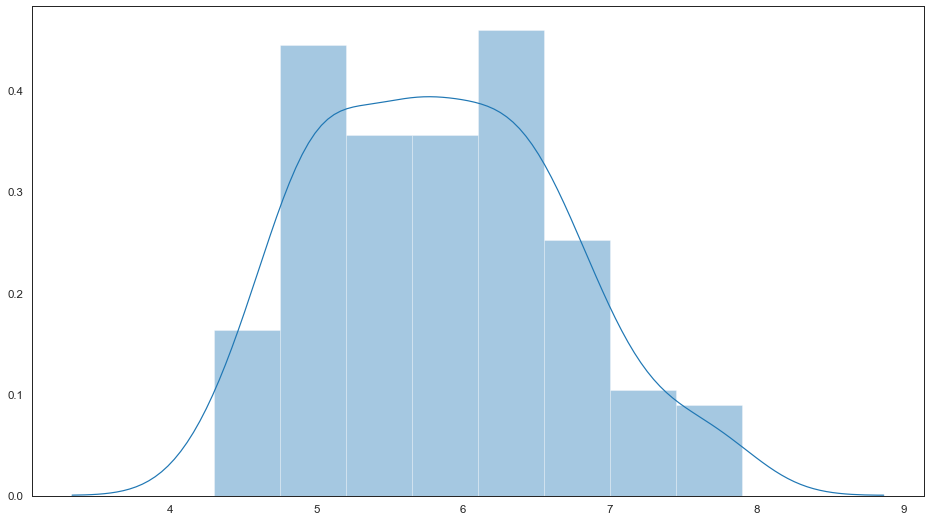

In [2]:
fig, ax = pyplot.subplots(figsize=(16, 9))

# 绘制直方图并拟合内核密度估计
sns.distplot(feature_0, ax=ax)

### 绘制直方图

当绘制直方图时，需要调整的参数是bin的数目（组数）。displot()会默认给出一个它认为比较好的组数，尝试不同的组数可能会揭示出数据不同的特征。

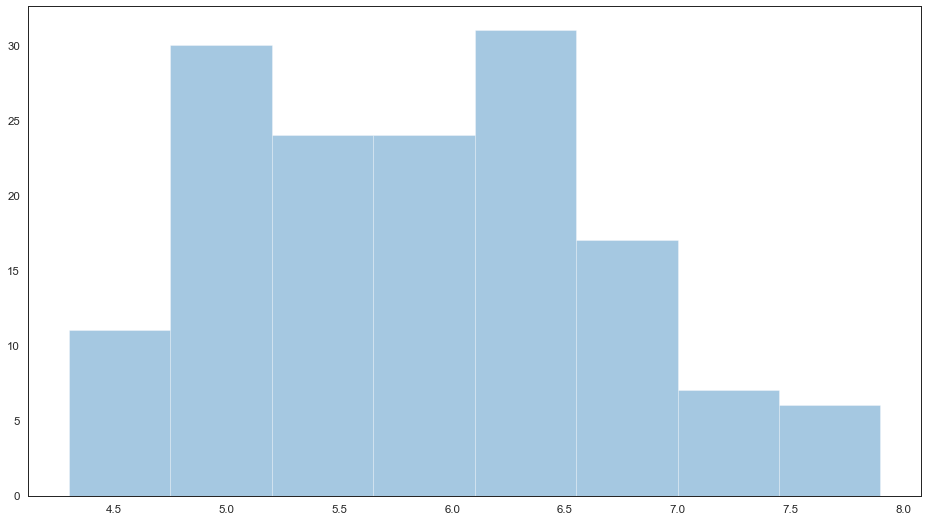

In [3]:
# 绘制直方图
fig, ax = pyplot.subplots(figsize=(16, 9))

sns.distplot(feature_0, ax=ax, kde=False)

### 绘制核密度估计图

核密度估计图使用的较少，但其是绘制出数据分布的有用工具，与直方图类似，KDE图以一个轴的高度为准，沿着另外的轴线编码观测密度。

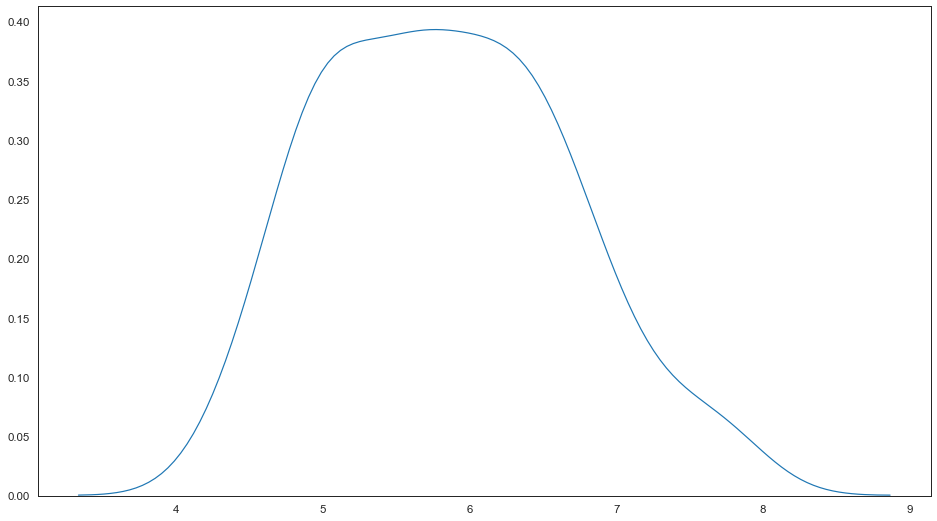

In [4]:
# 绘制核密度估计图
fig, ax = pyplot.subplots(figsize=(16, 9))

sns.distplot(feature_0, ax=ax, hist=False)

### 绘制拟合参数分布图

拟合出一个数据集的参数分布，直观上来评估其余观测数据是否关系密切。

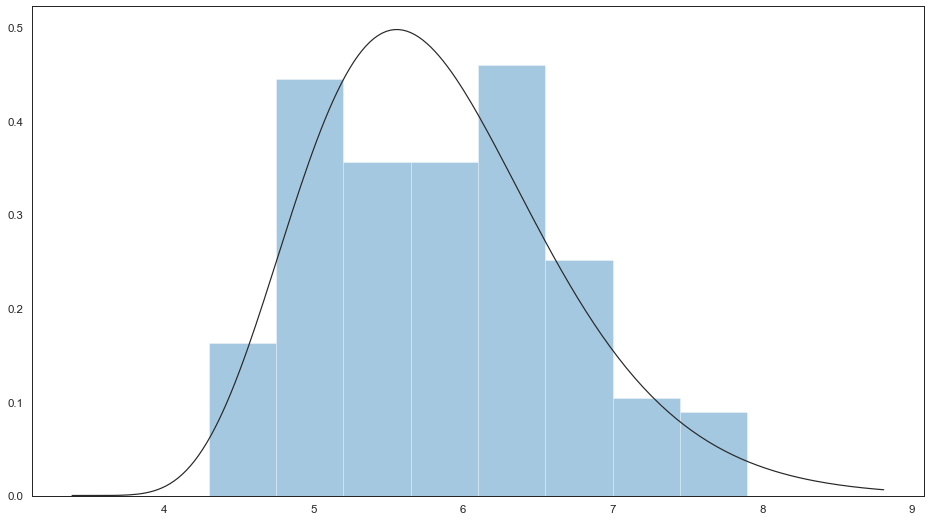

In [5]:
# 绘制拟合参数分布图
fig, ax = pyplot.subplots(figsize=(16, 9))

sns.distplot(feature_0, ax=ax, kde=False, fit=stats.gamma)

## 统计分布

### 偏度检测

偏度检测确定数据分布是否偏离正态分布，测试数据度量分布的不对称性：

    如果偏度介于 -0.5 和 0.5 之间，则数据是基本对称的。
    如果偏度介于 -1 和 -0.5 之间或者 0.5 和 1 之间，则数据是稍微偏斜的。
    如果偏度小于 -1 或大于 1， 则数据是高度偏斜的。

数据量分布：

    正态分布的偏度为0，则：两侧尾部长度对称；
    偏度为负，即负偏离（左偏离），则：数据位于平均值左边的比右边的少，直观表现为左边的尾部相对于右边的尾部要长。
    偏度为正，即正偏离（右偏态），则：数据位于平均值右边的比左边的少，直观表现为右边的尾部相对于左边的尾部要长。

平均数、中位数、众数关系：

    右偏时：平均数>中位数>众数
    左偏时：众数>中位数>平均数
    正态分布三者相等


In [6]:
# 偏度检测
print('Skewness of normal distribution: {}'.format(stats.skew(feature_0)))

Skewness of normal distribution: 0.3117530585022963


### 峰度检测

峰度用于描述特征数据分布的尾重：

    正态分布的峰度接近于 0。如果峰度大于 0，则分布尾部较重。
    如果峰度小于 0，则分布尾部较轻。


In [7]:
# 峰度检测
print('Kurtosis of normal distribution: {}'.format(stats.kurtosis(feature_0)))

Kurtosis of normal distribution: -0.5735679489249765


### 统计正态性检验

正态性检验量化数据是否符合高斯分布，p值做出如下解释：

    H0，原假设；H1，备则假设。p值越小越能否定H0。
    p <= alpha：拒绝 H0，非正态。
    p > alpha：不拒绝 H0，正态。


#### Shapiro-Wilk试验

In [8]:
w, p = stats.shapiro(feature_0)
print("w=%0.4f, p=%.4f"% (w, p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis can not be rejected")

w=0.9761, p=0.0102
The null hypothesis can be rejected


#### Q-Q图试验

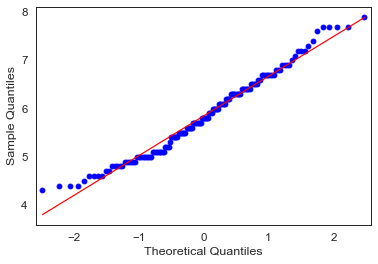

In [9]:
fig = sm.qqplot(feature_0, line='s')

从上图中，看到所有数据点都靠近 y=x，因此我们可以得出结论，它遵循正态分布。

In [10]:
#### 统计正态性检验

In [11]:
s2k2, p = stats.normaltest(feature_0)
print('s2k2=%.3f, p=%.3f' % (s2k2, p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis can not be rejected")

s2k2=5.736, p=0.057
The null hypothesis can not be rejected


### ANOVA方差分析

方差分析，可以看作是两组以上的t检验的推广。独立t检验用于比较两组之间的条件平均值。当我们想比较两组以上特征数据平均值时，使用方差分析。
方差分析测试模型中某个地方的平均值是否存在差异（测试是否存在整体效应），但它不能告诉我们差异在哪里（如果存在）。为了找出两组之间的区别，我们必须进行事后检验。
要执行任何测试，我们首先需要定义原假设和替代假设：

    零假设–各组之间无显着差异
    替代假设–各组之间存在显着差异

基本上，方差分析是通过比较两种类型的变化来完成的，即样本均值之间的变化，以及每个样本内部的变化。


In [12]:
### 单因素方差分析

In [13]:
F, p = stats.f_oneway(feature_0, feature_1, feature_2, feature_3)

alpha = 0.05

## 看看整体模型是否重要
print('F-Statistic=%.3f, p=%.3f' % (F, p))

if p < alpha:  # null hypothesis: 零假设–各组之间无显着差异
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis can not be rejected")

F-Statistic=482.915, p=0.000
The null hypothesis can be rejected


### 事后比较检验

当我们进行方差分析时，我们试图确定各组之间是否存在统计学上的显着差异。那么，如果我们发现统计学意义呢？

如果发现存在差异，则需要检查组差异的位置。因此，我们将使用Tukey HSD测试来确定差异所在：

In [14]:
mc = statsmodels.stats.multicomp.MultiComparison(feature_0[0:9],
                                                 feature_1[0:9])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
   2.9    3.0      0.5   0.1 -12.3364 13.3364  False
   2.9    3.1      0.2   0.1 -12.6364 13.0364  False
   2.9    3.2      0.3   0.1 -12.5364 13.1364  False
   2.9    3.4      0.4   0.1 -10.7166 11.5166  False
   2.9    3.5      0.7   0.1 -12.1364 13.5364  False
   2.9    3.6      0.6   0.1 -12.2364 13.4364  False
   2.9    3.9      1.0   0.1 -11.8364 13.8364  False
   3.0    3.1     -0.3   0.1 -13.1364 12.5364  False
   3.0    3.2     -0.2   0.1 -13.0364 12.6364  False
   3.0    3.4     -0.1   0.1 -11.2166 11.0166  False
   3.0    3.5      0.2   0.1 -12.6364 13.0364  False
   3.0    3.6      0.1   0.1 -12.7364 12.9364  False
   3.0    3.9      0.5   0.1 -12.3364 13.3364  False
   3.1    3.2      0.1   0.1 -12.7364 12.9364  False
   3.1    3.4      0.2   0.1 -10.9166 11.3166  False
   3.1    3.5      0.5   0.1 -12.3364 13.3364 

Tuckey HSD测试清楚地表明，feature_0和feature_1前10个样本之间存在显着差异（显然的，用的不同特征的数据）。

# 处理非正态分布数据

前面介绍检测数据分布的方法，那当发现数据不符合预设分布时候，该如何处理呢？我们可以使用Box-Cox转换将数据转换为正态分布。

具体转换方法，请查看：[标准化-非线性变换-映射到高斯分布](/posts/data-mining-preprocessing/#%E9%9D%9E%E7%BA%BF%E6%80%A7%E5%8F%98%E6%8D%A2 "标准化-非线性变换-映射到高斯分布")

# Reference

更多内容，请参考以下链接：

https://juejin.im/post/5ee8c79a6fb9a047ed242091
